# Final Exam

## Solid Body Calculations

A sphere of radius $R$ and uniform density $\rho$ has a cylindrical hold of radius $r$ drilled through its exact center. For the purposes of this problem, we can assume $\rho = 1 \; \mathrm{kg/m^3}$, $R = 0.5 \; \mathrm{m}$, and $r - 0.3 \mathrm{m}$.

### Part a:

Calculate the total mass of the object

In [5]:
""" Program to determine the VOLUME, MASS, and MOMENT OF INERTIA
of a cored ball """

import random
import numpy as np

NACCEPTED = 0
COUNT = 0
N = 10000000
DENSITY = 1

Y = np.zeros(N)
X = np.zeros(N)
Z = np.zeros(N)

while NACCEPTED < N:

    XVALUE = random.random() * 0.5
    YVALUE = random.random() * 0.5
    ZVALUE = random.random() * 0.5

    MAGNITUDE = XVALUE**2 + YVALUE**2 + ZVALUE**2
    CYLINDER = XVALUE**2 + YVALUE**2

    if MAGNITUDE <= 0.5 and CYLINDER >= 0.3:
        X[NACCEPTED] = XVALUE
        Y[NACCEPTED] = YVALUE
        Z[NACCEPTED] = ZVALUE
        NACCEPTED += 1
        COUNT += 1
    else:
        COUNT += 1

VOLUME = (NACCEPTED/COUNT) * 0.5**3
MASS = DENSITY * VOLUME

print("The solid body has a MASS of ", MASS, "kg")

The solid body has a MASS of  0.010574161398788645 kg


### Part b:

Calculate the moment of inertia about the shared axis of symmetry (call it $\hat{z}$).

$$L_z = \sum m_\alpha (x_{\alpha}^2 + y_{\alpha}^2)\omega$$

In [6]:
point_mass = mass / N

Summand = (X**2 + Y**2)*point_mass

L_z = np.sum(Summand)

print ("L_z =", L_z)

NameError: name 'mass' is not defined

### Part c:

Calculate the moment of inertia about the "$\hat{x}$ axis" (any oaxis orthoganal to $\hat{z}$).



In [91]:
Summand = (Y**2 + Z**2)*point_mass

L_x = np.sum(Summand)

print ("L_x =", L_x)

L_x = 0.0023821886660914753


## RC Circuit Behavior

The "RC circuit" is composed of a resistor $R$ and capacitor $C$ in a series circuit driven by a voltage or current source.

The circuit behavior is given by the equation

$$ R \frac{dq}{dt} + \frac{1}{C}q = U(t)$$

where $q$ is teh capacitor charge, $dq/dt = I$ is the circuit current, and $U(t)$ is the applied voltage.

We would like ot know how the system responds t oa suare imput pulse:

$$ U(t) = 0 \; \; \; \mathrm{for} \; t<t_1$$
$$ U(t) = U_0 = 6V  \; \; \; \mathrm{for} \; t_1<t<t_2$$
$$ U(t) = 0 \; \; \; \mathrm{for} \; t>t_2$$

In this problem we will assume $R = 100 \Omega$, $C=4.7 \times 10^{-5} \mathrm{AsV}-1$.


### Part a:

Assuming $q(0)=0$, solve the differential equation numerically and plot $q(t)$ and $I(t)$ over the interval $0<t<t_{final}$, with $t_1 = 0$, $t_2 = 2RC$, and $t_{final} = 4RC$.

$$\frac{dq}{dt} = \frac{U(t)}{R} - \frac{q}{RC}$$

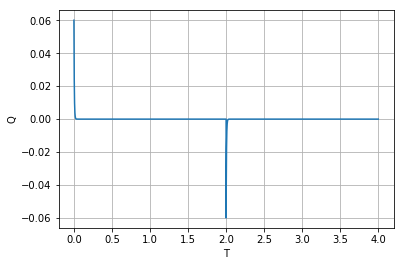

In [3]:
"""Runge Kutta solution to the RC Circuit ODE"""
# rk4.py, Notebook Version

import matplotlib.pyplot as plt          #Load Matplotlib
import numpy as np

R = 100
C = 4.7*10**(-5)

#   Initialization
A = 0
B = 4
N = 1000001
TT = np.zeros(N+1)
QQ = np.zeros(N+1)
Q = 0
T = A
TT[0] = T
QQ[0] = Q
H = (B-A)/(N-1)

def dq_dt(time, charge):
    """Returns the current in the RC circuit at a given time"""
    if time < 2:
        return (6/R) - charge/(R*C)
    if time >= 2:
        return -charge/(R*C)

j = 0
while T < B:                          # Time loop
    if (T + H) > B:
        H = B - T                       # Last step
    K1 = H * dq_dt(T, Q)
    K2 = H*dq_dt(T + H/2., Q + K1/2.)
    K3 = H*dq_dt(T + H/2., Q + K2/2.)
    K4 = H*dq_dt(T + H, Q + K3)
    Q = Q + (K1 + 2.*(K2 + K3) + K4)/6.
    j += 1
    T += H
    TT[j] = T
    QQ[j] = Q

I = []

for j in range(0, len(QQ)-1):
    I.append((QQ[j+1] - QQ[j])/H)

plt.plot(TT[0:len(I)], I)
plt.grid(True)
plt.ylabel('Q')
plt.xlabel('T')
plt.show()


Compare your ersult for the current to the analyric solution $$I(t) = \frac{U_0}{R}(e^{-(t-t_1)/RC} \Theta (t-t_1) - e^{-(t-t_2)/RC} \Theta (t-t_2))$$

where $\Theta(x)$ is the Heviside step function.

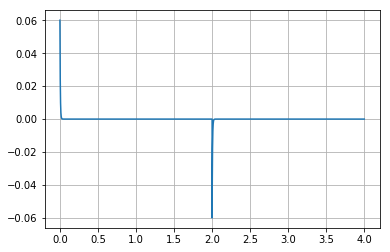

In [4]:
def rc_current(time):
    """Returns the analytic RC current"""
    if time < 2:
        return (6/R)*np.exp(-time/(R*C))
    if time >= 2:
        return -(6/R)*np.exp(-(time-2)/(R*C))

TIME = np.linspace(0, 4, N)
CURRENT = []

for t in TIME:
    CURRENT.append(rc_current(t))

plt.plot(TIME, CURRENT)
plt.grid(True)
plt.show()

The solutions look identical!